In [ ]:
!pip install ydata-profiling
!pip install calmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
# Import ProfileReport from ydata_profiling instead of pandas_profiling
from ydata_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/supermarket_sales.csv')

In [ ]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
df.tail()

Invoice ID Branch      City Customer type  Gender  \
998   347-56-2442      A    Yangon        Normal    Male   
999   849-09-3807      A    Yangon        Member  Female   
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
998       Home and lifestyle       65.82       1.0   3.291   69.111  2/22/19   
999      Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
998   15:33     Cash   65.82                 4.761905         3.291     4.1  
999   13:28     Cash  618.38                 4.761905        30.919     6.6  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [ ]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

<ipython-input-51-fb5ecebf89eb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


In [ ]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [ ]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

<ipython-input-21-f29bf89c728d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


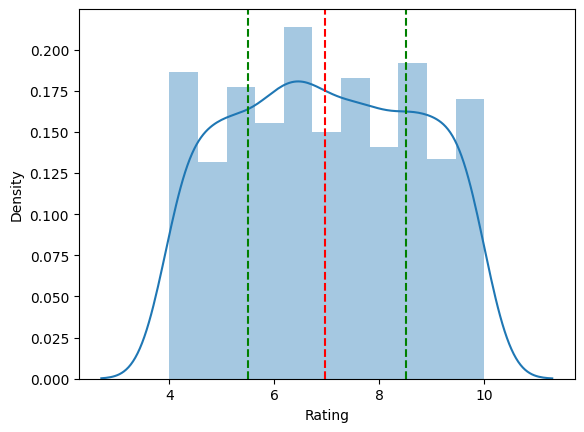

In [ ]:
sns.distplot(df['Rating'])
plt.axvline(x= np.mean(df['Rating']), c='red',ls='--',label ='mean')
plt.axvline(x = np.percentile(df['Rating'],25), c='green',ls='--',label ='25-75th percentile')
plt.axvline(x = np.percentile(df['Rating'],75), c='green',ls='--')

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

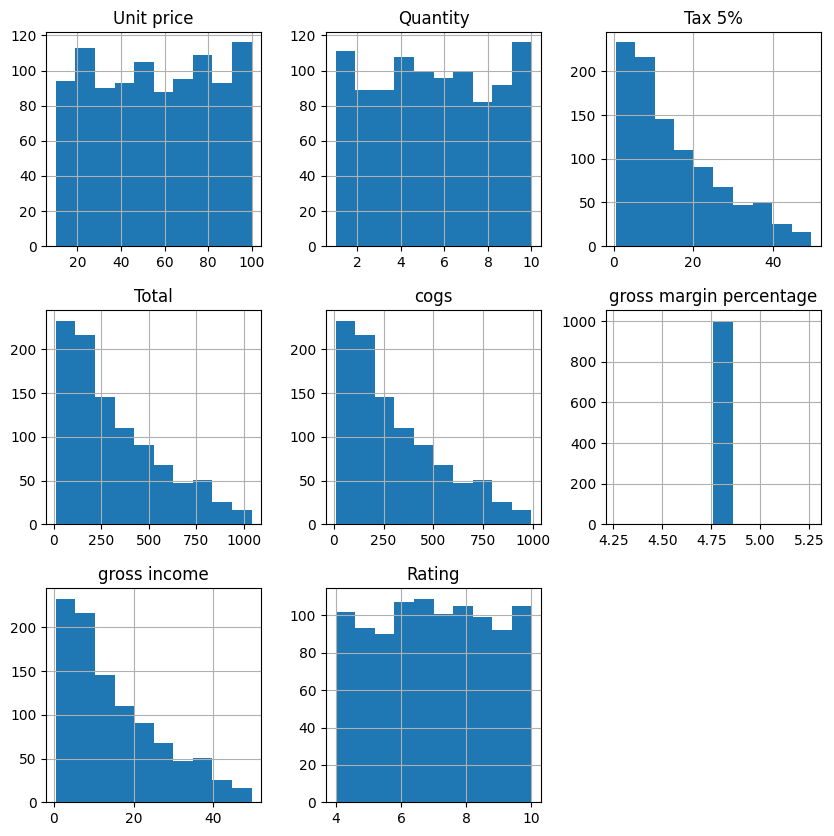

In [ ]:
df.hist(figsize=(10,10))

<Axes: xlabel='count', ylabel='Branch'>

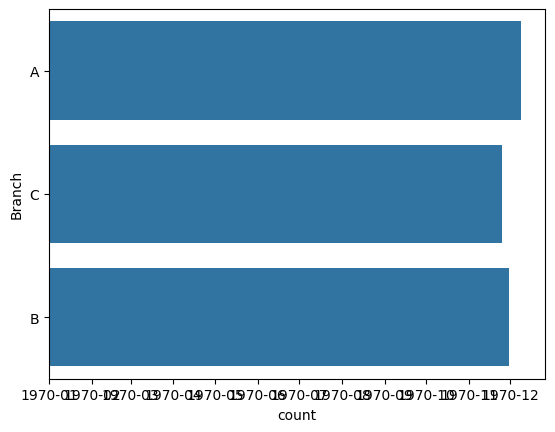

In [ ]:
sns.countplot(df['Branch'])

In [ ]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Payment'>

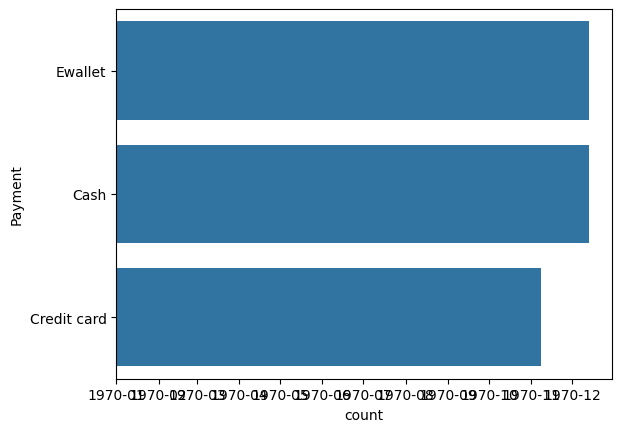

In [ ]:
sns.countplot(df['Payment'])

<Axes: xlabel='Rating', ylabel='gross income'>

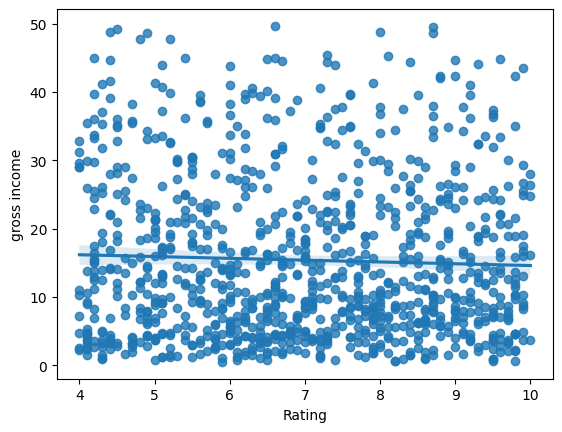

In [ ]:
sns.regplot(x=df['Rating'], y=df['gross income'])

<Axes: xlabel='Branch', ylabel='gross income'>

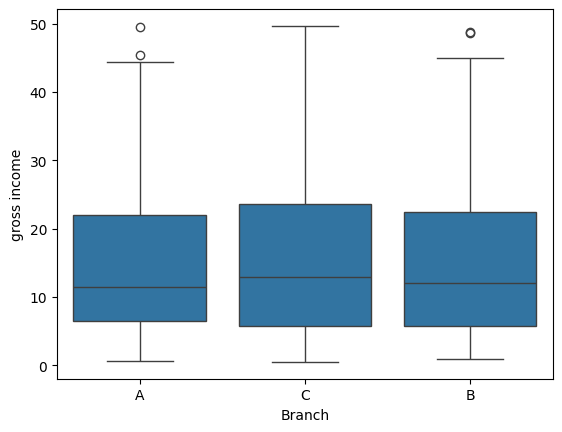

In [ ]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

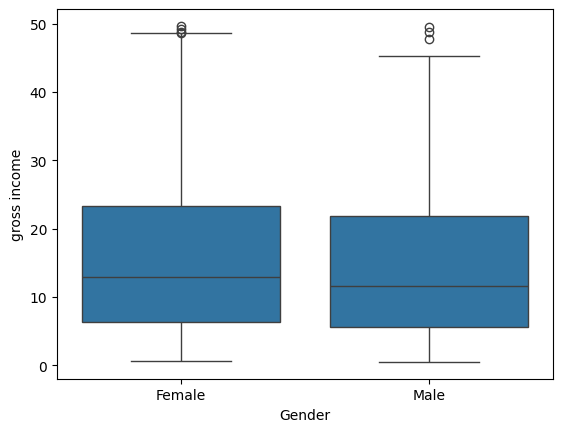

In [ ]:
 sns.boxplot(x=df['Gender'], y=df['gross income'])

In [ ]:
df.groupby(df.index)

In [ ]:
sns.lineplot(df.groupby(df.index).mean())

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='Date', ylabel='gross income'>

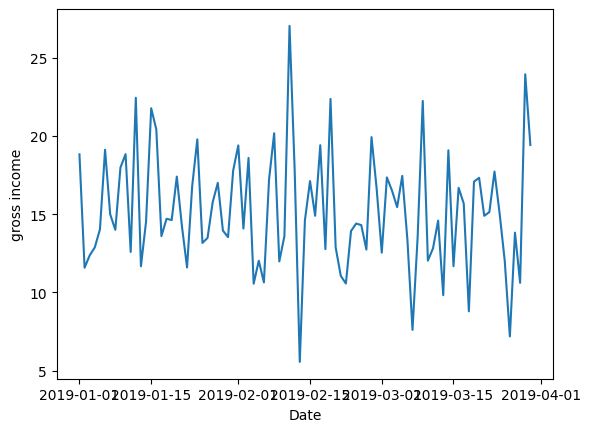

In [ ]:


# Perform the groupby and mean operations on the numeric DataFrame
sns.lineplot(x = numeric_df.groupby(numeric_df.index).mean().index, y = numeric_df.groupby(numeric_df.index).mean()['gross income'])

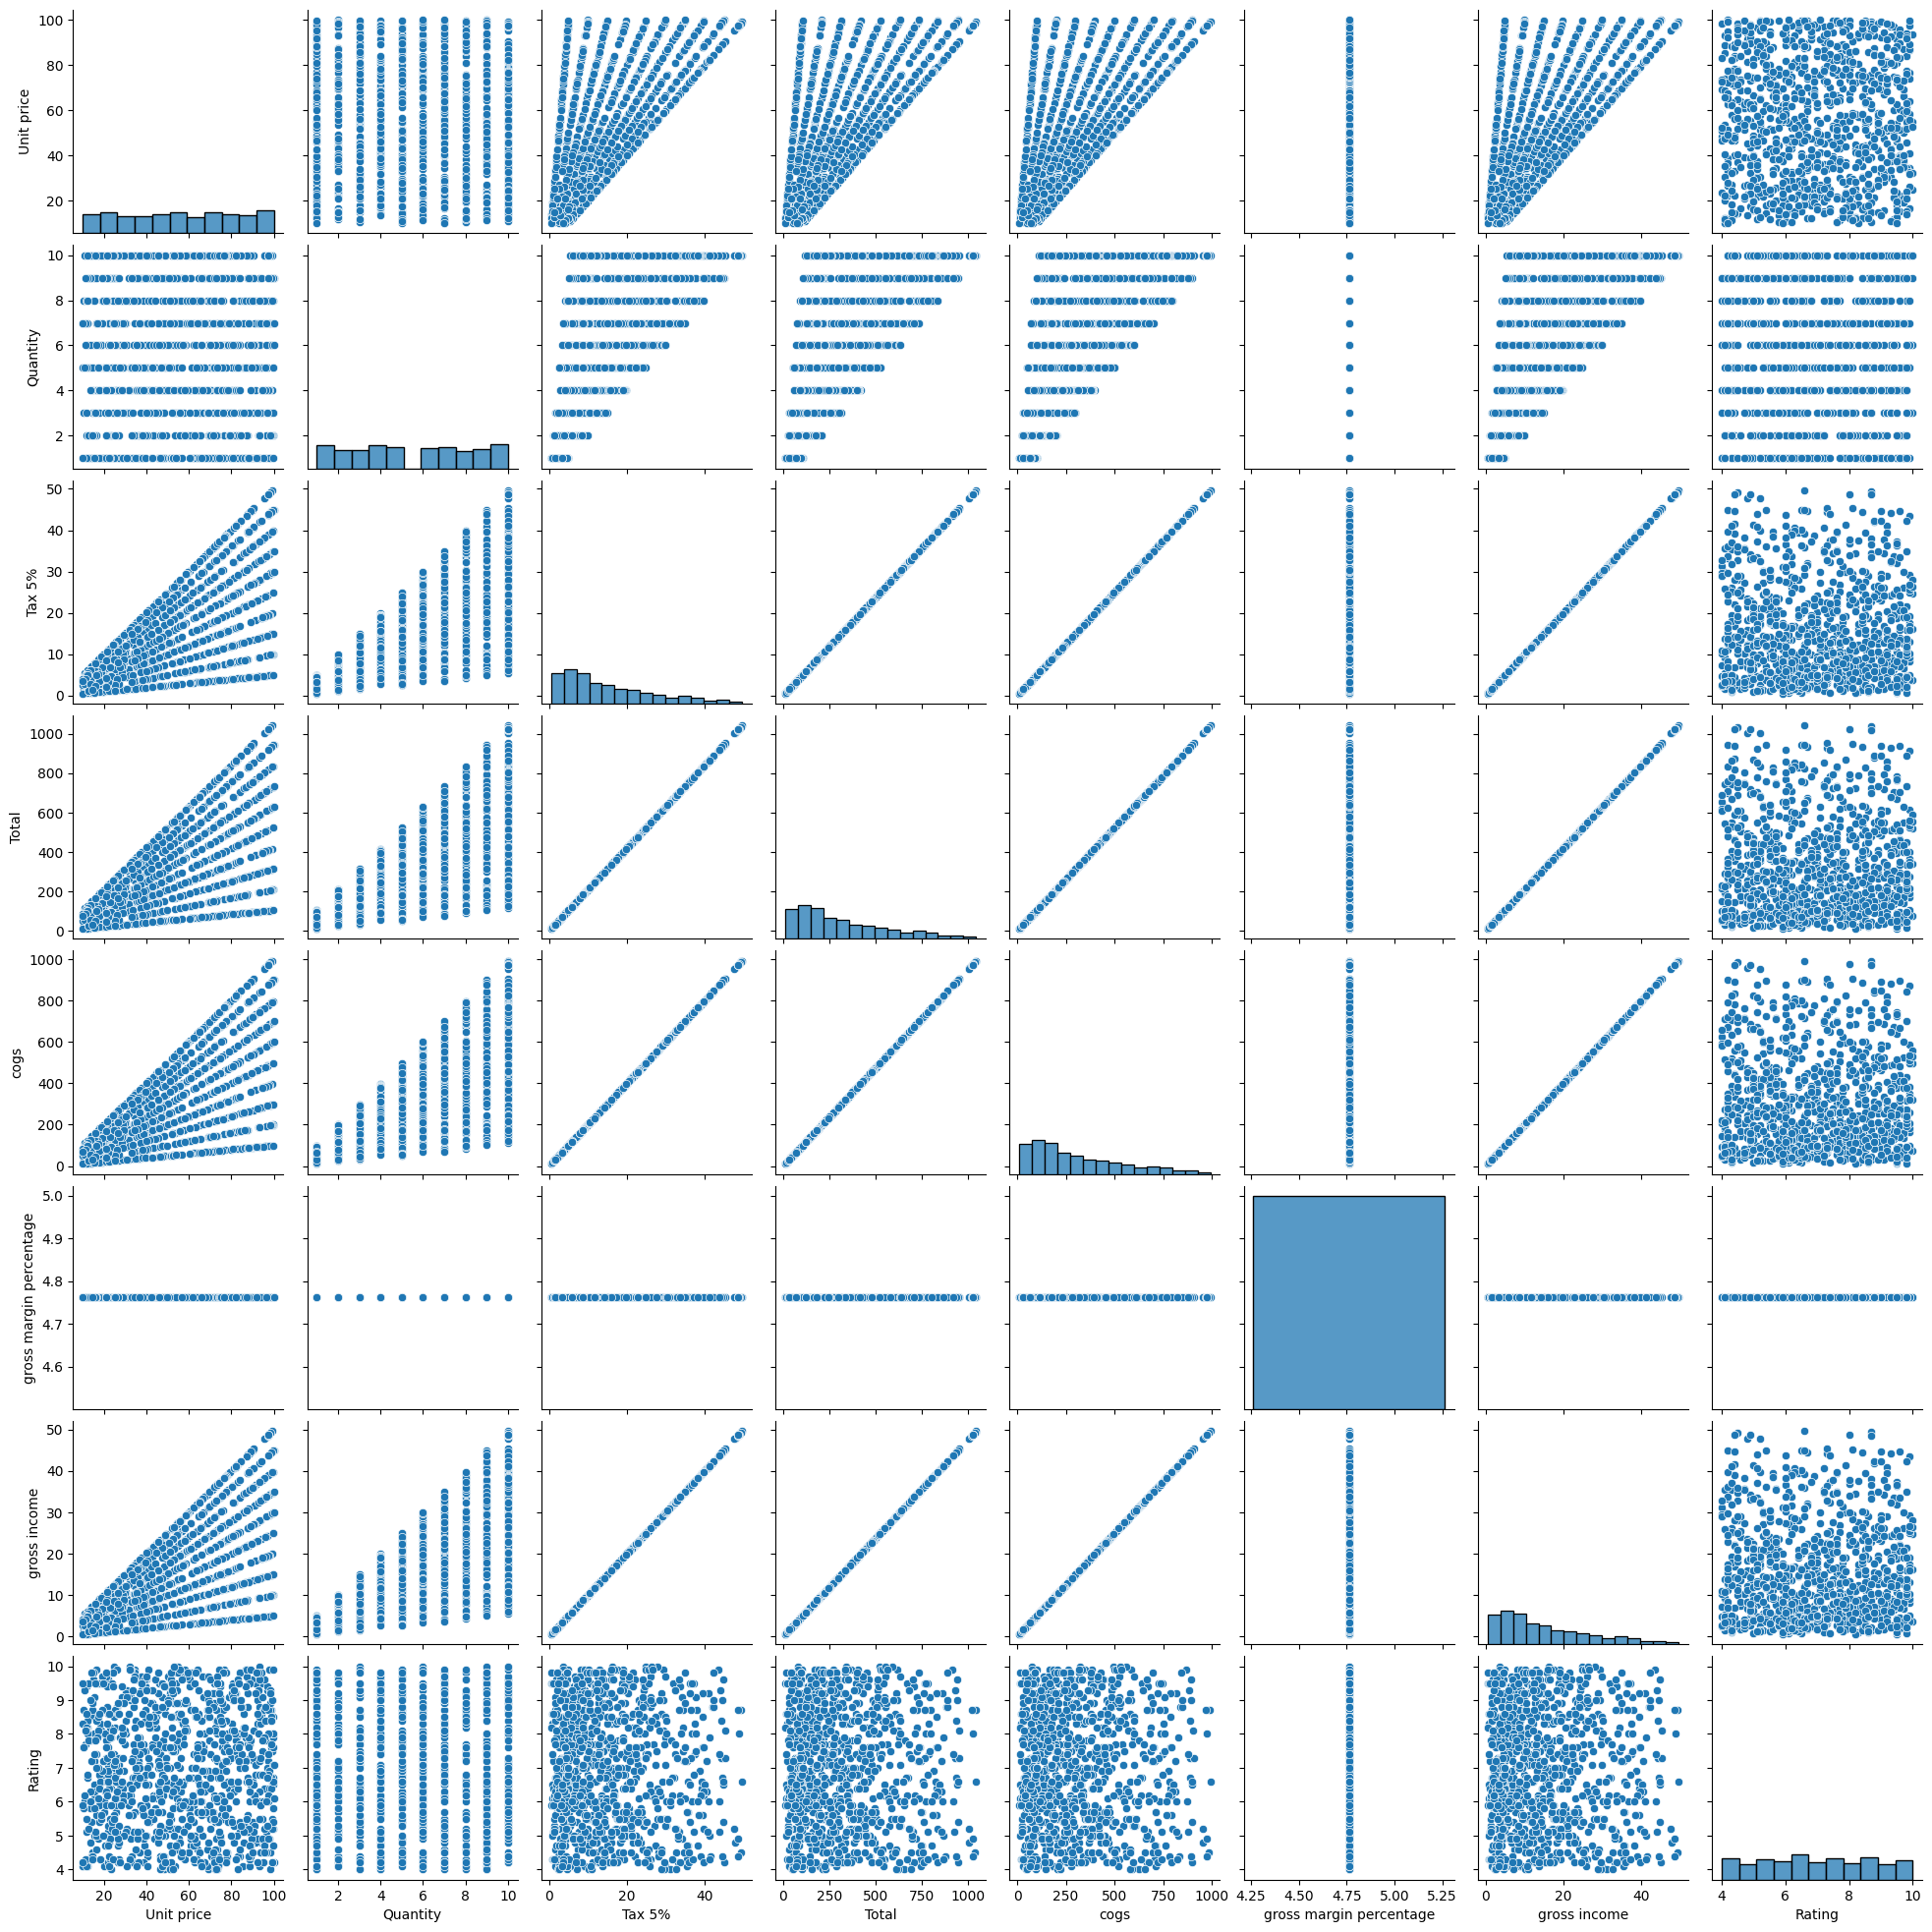

In [ ]:
df = df.reset_index()  # Reset the index to default numeric index
sns.pairplot(df)

In [ ]:
df.duplicated().sum()

3

In [ ]:
df[df.duplicated()== True]

Date   Invoice ID Branch      City Customer type  Gender  \
1000 2019-02-18  849-09-3807      A    Yangon        Member  Female   
1001 2019-03-10  745-74-0715      A    Yangon        Normal    Male   
1002 2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total   Time  \
1000     Fashion accessories       88.34       7.0  30.919  649.299  13:28   
1001  Electronic accessories         NaN       2.0   5.803  121.863  20:46   
1002  Electronic accessories       87.08       NaN  30.478  640.038  15:17   

      Payment    cogs  gross margin percentage  gross income  Rating  
1000     Cash  618.38                 4.761905        30.919     6.6  
1001  Ewallet  116.06                 4.761905         5.803     8.8  
1002     Cash  609.56                 4.761905        30.478     5.5

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.isna().sum()/len(df)

Date                       0.000
Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: >

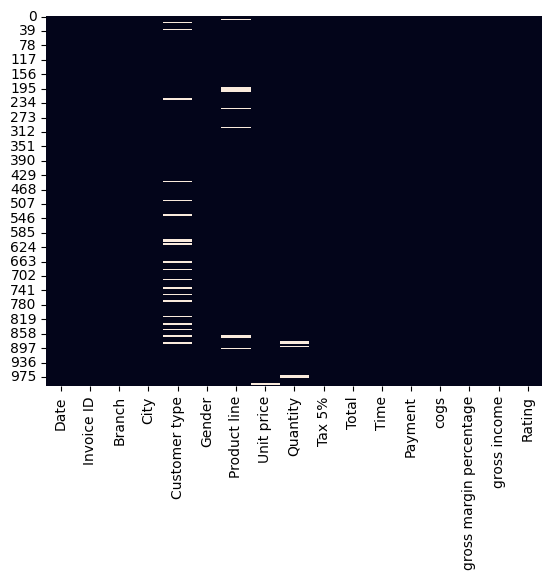

In [ ]:
sns.heatmap(df.isna(),cbar = False)

In [ ]:
df.fillna(df.mean(),inplace= True)

TypeError: can only concatenate str (not "int") to str

In [ ]:
df.fillna(numeric_df.mean(), inplace = True)

In [ ]:
df.mode().iloc[0]

Date                       2019-02-07 00:00:00
Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                                 NaN
Quantity                                   NaN
Tax 5%                                     NaN
Total                                      NaN
Time                                     14:42
Payment                                Ewallet
cogs                                       NaN
gross margin percentage                    NaN
gross income                               NaN
Rating                                     NaN
Name: 0, dtype: object

In [ ]:
df.fillna(df.mode().iloc[0],inplace=True)

<ipython-input-81-a295f8d898ac>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mode().iloc[0],inplace=True)


<Axes: >

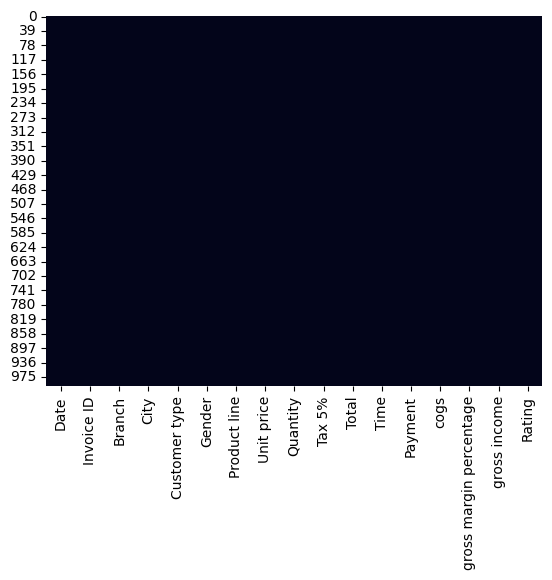

In [ ]:
sns.heatmap(df.isna(),cbar = False)

In [ ]:
dataset = pd.read_csv('/content/supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
np.corrcoef(df['gross income'],df['Rating'])

NameError: name 'np' is not defined

In [ ]:
 np.round(numeric_df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<Axes: >

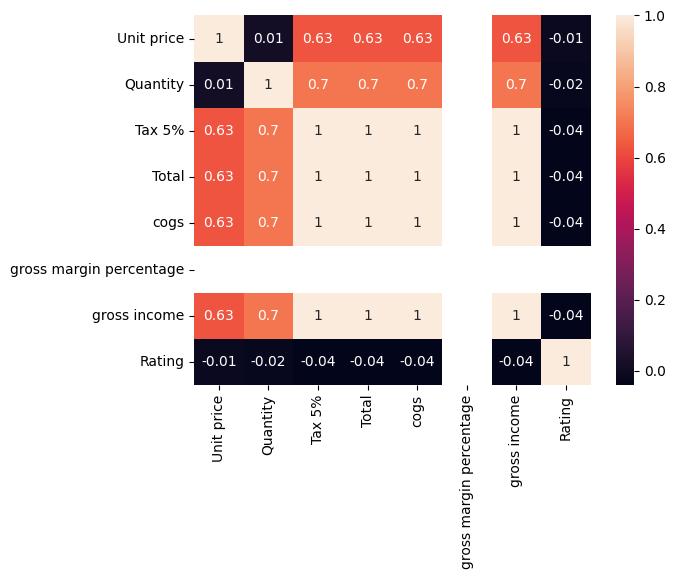

In [ ]:
sns.heatmap(np.round(numeric_df.corr(),2),annot=True)